<a href="https://colab.research.google.com/github/Tarasishbhattacharya/car_price_predict/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
working_dir="/content/drive/MyDrive/dat/"
car_df=pd.read_csv(working_dir+"car data.csv")

In [ ]:
# display first five data
car_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
#  unique values of categorical feature
print(car_df["Fuel_Type"].unique())
print(car_df["Seller_Type"].unique())
print(car_df["Transmission"].unique())
print(car_df["Owner"].unique())
print(car_df["Car_Name"].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]
['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Act

In [ ]:
#  checking missing or null  values
car_df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
# statistical measure
car_df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
#  drop the Car_Name
car_df.drop("Car_Name",axis=1,inplace=True)
car_df.head(1)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0


In [ ]:
#  add a new column named curr_year
car_df["curr_year"]=2023

In [ ]:
car_df.head(1)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,curr_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023


In [ ]:
#  add a new column name no_year
car_df["no_year"]=car_df["curr_year"]-car_df["Year"]
car_df.head(1)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,curr_year,no_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023,9


In [ ]:
#  drop both the column Year and curr_year as we do not need
car_df.drop(["Year","curr_year"],axis=1,inplace=True)
car_df.head(1)

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9


In [ ]:
#  convert all the categorical column to the numerical column using one hot encoding

car_df=pd.get_dummies(car_df,drop_first=True)
car_df.head(1)

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1


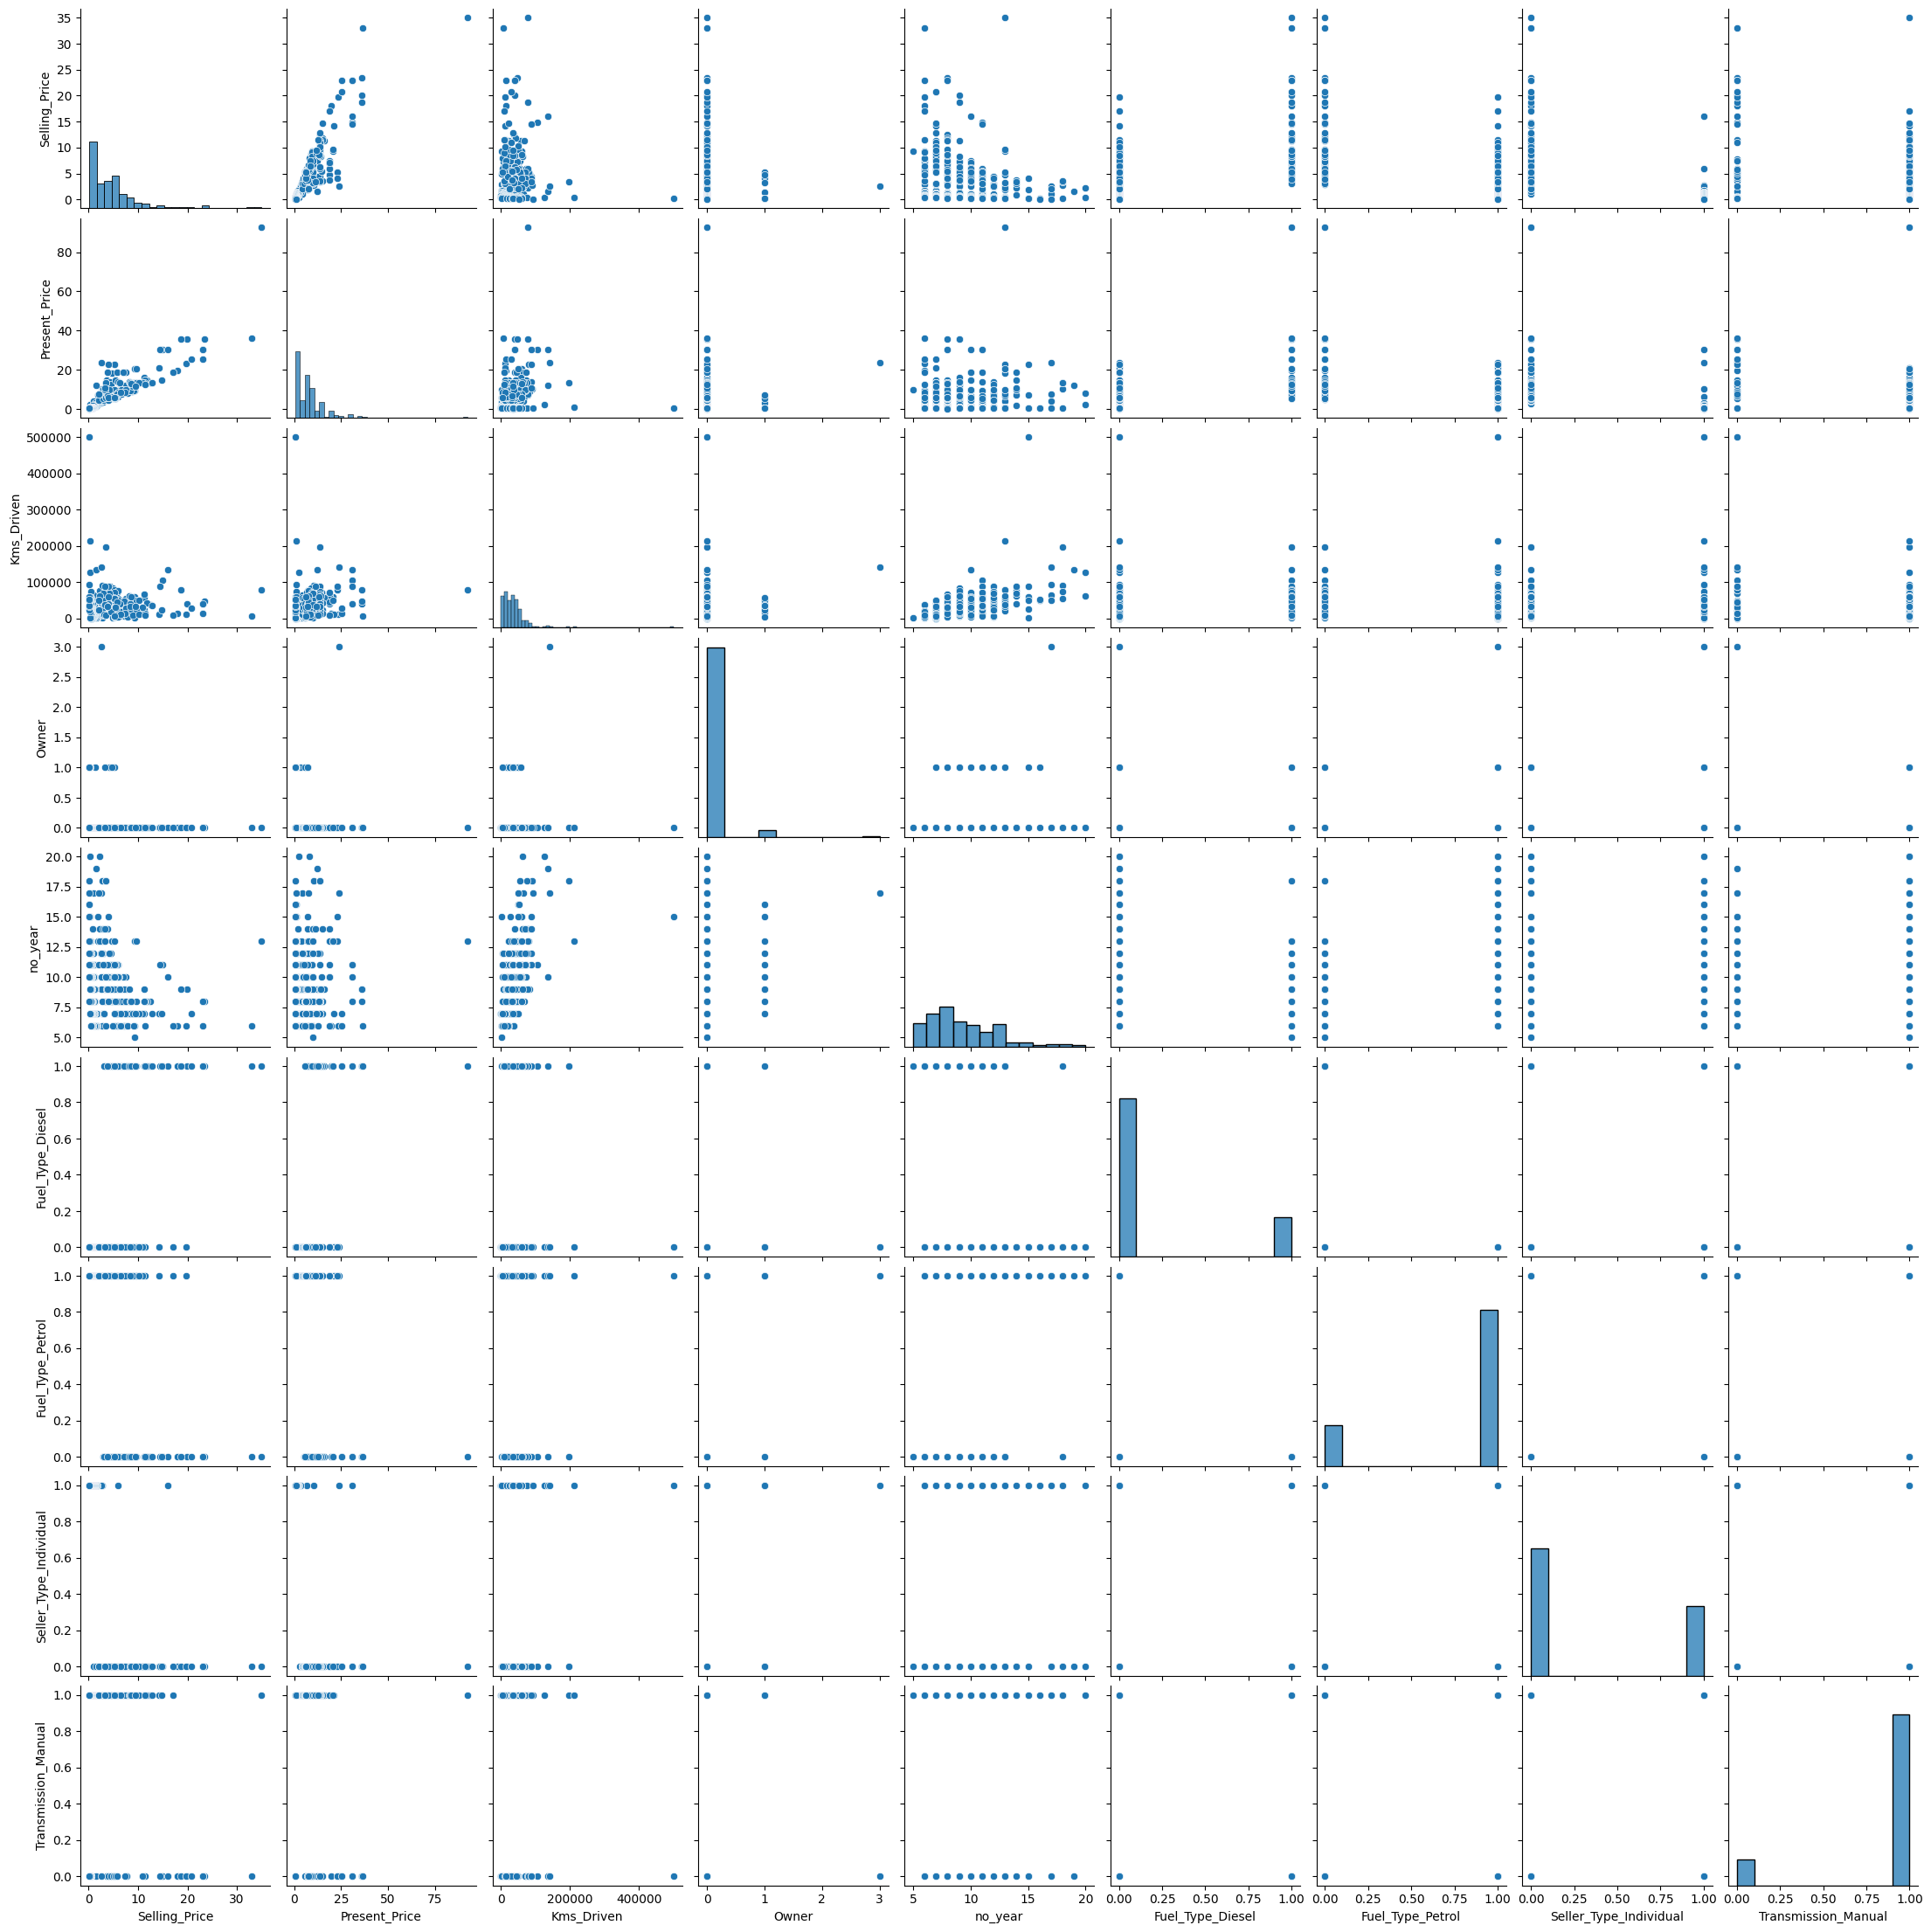

In [ ]:
#  create a pairplot
sns.pairplot(car_df)

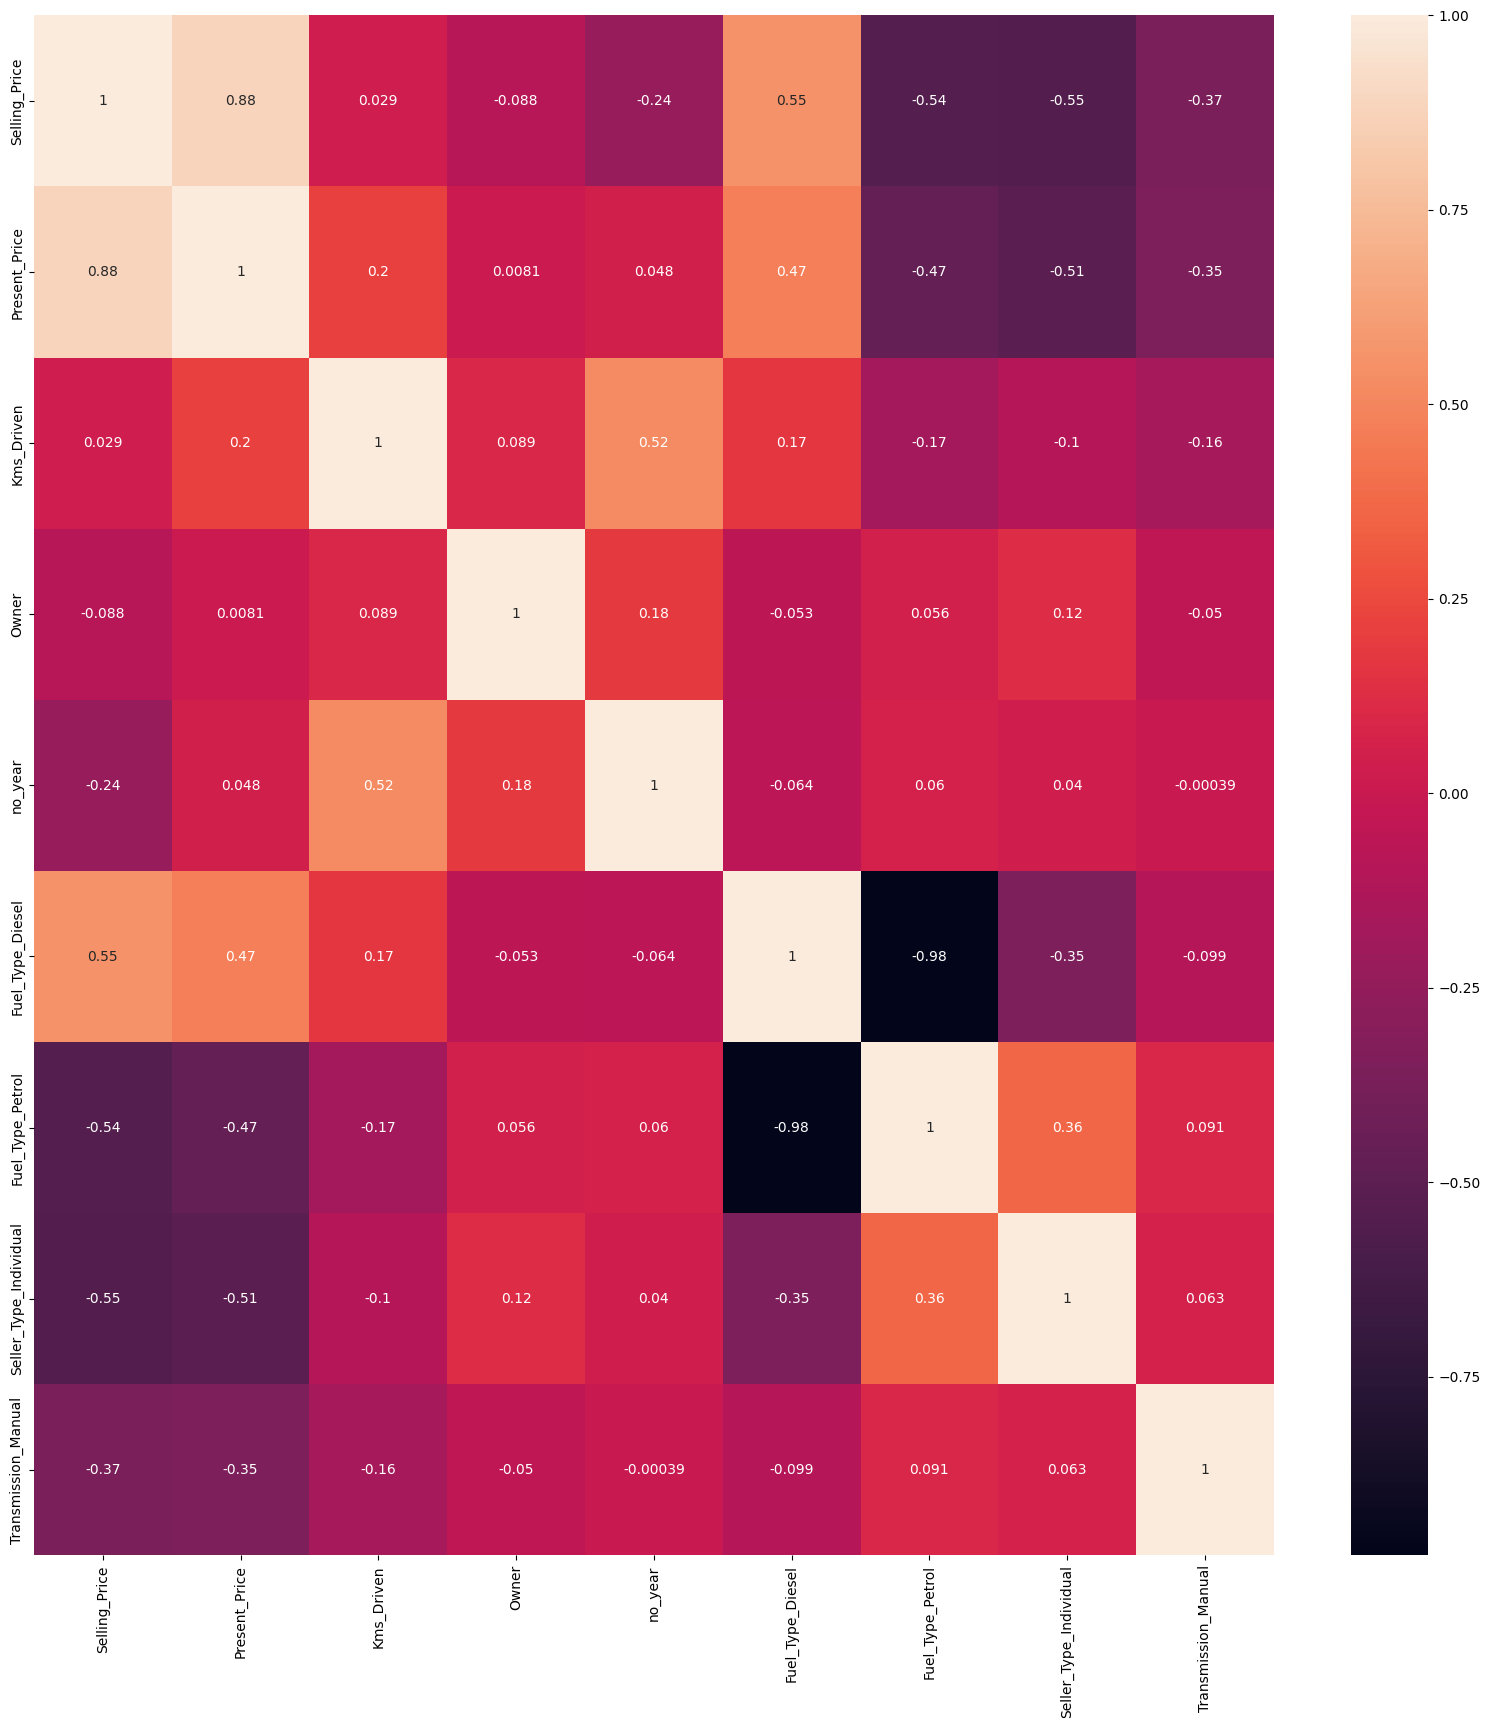

In [ ]:
corrmat=car_df.corr()
top_corr_feature=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(car_df[top_corr_feature].corr(),annot=True)

In [ ]:
#  independent and dependent feature
x=car_df.drop("Selling_Price",axis=1)
y=car_df["Selling_Price"]

In [ ]:
# independent data
x.head()

,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,9,0,1,0,1
1,9.54,43000,0,10,1,0,0,1
2,9.85,6900,0,6,0,1,0,1
3,4.15,5200,0,12,0,1,0,1
4,6.87,42450,0,9,1,0,0,1


In [ ]:
#  dependent data
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [ ]:
#  importing required librrary from sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [ ]:
#  train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [ ]:
# Number of trees
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
#  Number of feature
max_features=["auto","sqrt"]
# Number of levels
max_depth=[int(x) for x in np.linspace(5,30,num=6)]

In [ ]:
# randomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
random_grid={
    "n_estimators":n_estimators,
    "max_features":max_features,
    "max_depth":max_depth
}


In [ ]:
model=RandomForestRegressor()


In [ ]:
random_search=RandomizedSearchCV(estimator=model,param_distributions=random_grid,scoring="neg_mean_squared_error",n_iter=10,cv=5)
random_search.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error')

In [ ]:
random_search.best_estimator_

RandomForestRegressor(max_depth=15, max_features='auto', n_estimators=200)

In [ ]:
random_search.best_score_

-2.165533743523438

In [ ]:
y_test

223     8.25
150     0.50
226     5.25
296     9.50
52     18.00
       ...  
137     0.65
227     2.55
26      4.15
106     1.35
92      3.51
Name: Selling_Price, Length: 61, dtype: float64

In [ ]:
y_predict=random_search.predict(x_test)
y_predict

array([ 6.907    ,  0.4645   ,  4.59025  ,  8.9238   , 15.0961   ,
        5.3045   ,  3.1845   ,  0.4351   ,  3.858    ,  4.72825  ,
        2.8785   ,  0.76215  ,  4.78825  ,  7.0551   ,  7.60545  ,
       15.03235  ,  6.65925  ,  3.99     ,  0.4546   ,  1.60025  ,
        2.9945   ,  4.93325  ,  5.327    ,  9.6641   ,  0.2027   ,
        0.73755  ,  0.29155  ,  0.71455  ,  0.46615  ,  4.17185  ,
        2.493    ,  5.93075  ,  0.49365  ,  7.43975  ,  3.30045  ,
        1.16315  ,  5.66975  ,  5.32325  ,  0.25515  ,  8.01225  ,
        7.82565  , 23.57225  ,  4.91525  ,  4.397    ,  5.73625  ,
       11.3715   ,  0.2467   ,  0.78815  ,  5.4505   ,  6.6223125,
        6.59865  ,  3.09225  ,  5.3715   , 24.5835   ,  1.17165  ,
        1.1486   ,  0.4603   ,  2.52575  ,  3.50275  ,  2.45005  ,
        3.80945  ])

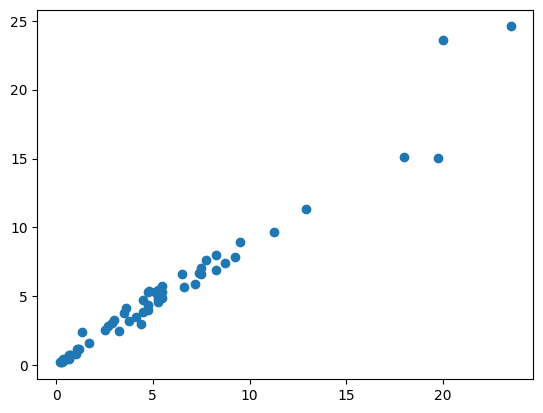

In [ ]:
plt.scatter(y_test,y_predict)

In [ ]:
import pickle
# open a file where you want to store the data
file=open('random_forest_regression_model.pkl','wb')
# dumb info to that file
pickle.dump(random_search,file)